# PCA - Library

## PCA - Introduction 

- Đúng như với mục đích của PCA giảm chiều dữ liệu của một vector m chiều xuống còn k chiều  
- Như vậy ta có thể sử dụng PCA vào các trường hợp 
    + Các bài toán học máy đơn giản , ví dụ X có m đặc trưng , ta muốn giảm nó xuống k đặc trưng . Nghĩa là X có m đặc trưng ví dụ loài hoa thì có chiều dài , màu sắc ,... gồm m đặc trưng như thế sau đó ta sẽ giảm chiều nó xuống thành k đặc trưng 
    + Đối với bài toán nhận diện ảnh vì ảnh được chuyển thành một matrix hoặc tensor . Mặc khác với các model Deep learning thì đầu vào của nó cũng yêu cầu là một matrix hoặc tensor (matrix hoặc tensor fixcel của ảnh) , chính vì thế mà nó thường không được áp dụng cho ảnh . <strong style="color:yellow">Mà nó thường được áp dụng trong Transfer learning . Cụ thể là sau các lớp Conv , trước khi đến các lớp FCs thì ta cho qua PCA để giảm chiều . Ví dụ đầu ra của VGG sau khi qua flatten (làm phẳng) là một vector với số chiều là (4096,1) ta sẽ cho nó qua PCA trở thành (k,1) với k là số chiều được giảm xuống, sau đó mới cho qua các lớp FCs ví dụ như Dense(512,sigmoid) rồi Dense(10,softmax)</strong>

Trong `PCA` của `scikit-learn`, hai phương thức `fit_transform()` và `transform()` đều được sử dụng để giảm số chiều của dữ liệu bằng phương pháp phân tích thành phần chính (PCA). Tuy nhiên, chúng có một số khác biệt quan trọng:

1. **fit_transform():**
   - Phương thức `fit_transform()` được sử dụng để tính toán các thành phần chính (principal components) từ dữ liệu đầu vào và sau đó giảm số chiều của dữ liệu xuống theo số lượng thành phần chính được chỉ định.
   - Nó kết hợp hai công đoạn: tính toán thành phần chính từ dữ liệu huấn luyện và sử dụng các thành phần chính đó để giảm chiều dữ liệu.
   - Thường được sử dụng cho dữ liệu huấn luyện.

2. **transform():**
   - Phương thức `transform()` được sử dụng để giảm số chiều của dữ liệu bằng cách sử dụng các thành phần chính đã được tính toán từ dữ liệu huấn luyện (hoặc từ việc gọi `fit_transform()` trước đó).
   - Nó chỉ thực hiện phần giảm chiều của dữ liệu mà không tính toán bất kỳ thứ gì mới từ dữ liệu đầu vào.
   - Thường được sử dụng cho dữ liệu kiểm tra hoặc dữ liệu mới mà bạn muốn giảm chiều.

Tóm lại, `fit_transform()` sẽ tính toán các thành phần chính và giảm chiều dữ liệu, trong khi `transform()` chỉ giảm chiều dữ liệu sử dụng các thành phần chính đã được tính toán từ trước.

#### Một số lưu ý ```Quan Trọng``` : 
1. pca = PCA(n_components=700) : Giảm xuống k chiều với k = 700 . Tuy nhiên chưa biết giữ lại được bao nhiêu % phương sai
    + pca.fit_transform(X) : Như đã nói , nó có tính toán dựa trên tập dữ liệu nên . Tập dữ liệu X có X.shape = (n,m) thì giảm xuống k chiều với điều kiện ``` k <= n,m ``` . Thường được dùng cho tập train . ``` fit_transform là huấn luyện cho pca nên trong quá trình giảm chiều thì ít nhất đầu tiên phải fit_transform cho nó```
    + pca.transform(X) : Không cần điều kiện gì cả , transform thường được dùng cho tập test và valid . Sử dụng lại fit_transform trước đó để giảm xuống 700 chiều . 
    + => Lưu ý với cách này , ta phải sử dụng : np.cumsum(pca.explained_variance_ratio_)[-1] để xem nó giữ lại bao nhiêu % phương sai , thường là phải từ 95% - 99% 

2. pca = PCA(n_components=0.95) : Giữ lại 95% phương sai và số chiều giảm xuống k sẽ được tự động tính toán cho ta 
    + Sử dụng fit_transform thì không dùng lại fit_transform trước đó mà đi huấn luyện lại 
    + Sử dụng transform thì sử dụng fit_transform trước đó , lấy số chiều được giảm xuống trước đó của fit_transform .


## Instructions for using the library PCA (Final Code PCA Library) 

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

#### Load dữ liệu 

In [3]:
# Load dữ liệu MNIST từ scikit-learn
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(int)

In [11]:
X_train, X_remain, y_train, y_remain = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.33, random_state=42)
print(X_train.shape) # (56000, 784)
print(X_valid.shape) # (9380, 784)
print(X_test.shape) # (4620, 784)
# train : valid : test = 7 : 2 : 1 


(56000, 784)
(9380, 784)
(4620, 784)


### TH1. Giữ lại p% phương sai 

In [12]:
pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai

In [13]:
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape) # (56000, 154)
print(X_valid_reduced.shape) # (9380, 154)
print(X_test_reduced.shape) # (4620, 154)

(56000, 154)
(9380, 154)
(4620, 154)


- => Với yêu cầu là 95% phương sai được giữ lại thì số chiều được giảm xuống sau khi fit_transform cho tập train là 154 
- Valid và test sử dụng transform nên số chiều cũng được giảm xuống theo là 154 

In [15]:
X_valid_reduced = pca.fit_transform(X_valid)
X_test_reduced = pca.fit_transform(X_test)
print(X_valid_reduced.shape) # (9380, 152)
print(X_test_reduced.shape) # (4620, 148)

(9380, 152)
(4620, 148)


- => Nếu không sử dụng pca của X_train training lại từ đầu cho pca thì với 95% số chiều valid có thể giảm xuống là 152 và test là 148 

### TH2. Giảm xuống k chiều 
- Có thể dùng cách này , nhưng không tối ưu bằng cách trên . Mỗi cách có ưu nhược riêng và tùy từng trường hợp mà ta nên dùng cách nào . 

In [28]:
pca = PCA(n_components=700)  # Giảm xuống số chiều là 700 

In [19]:
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape) # (56000, 700)
print(X_valid_reduced.shape) # (9380, 700)
print(X_test_reduced.shape) # (4620, 700)

(56000, 700)
(9380, 700)
(4620, 700)


- => Ở đây ta dùng transform cho valid và test nghĩa là sử dụng lại pca của fit_transform X_train , số chiều giảm xuống cũng sẽ là 700 
- => Thường thì ta sẽ làm như vậy vì tất nhiên khi chia dữ liệu thì dữ liệu train sẽ lớn nhất và các dữ liệu train , valid và test sẽ khác nhau 

In [21]:
X_valid_reduced = pca.fit_transform(X_valid)
X_test_reduced = pca.fit_transform(X_test)
print(X_valid_reduced.shape) # (9380, 700)
print(X_test_reduced.shape) # (4620, 700)

(9380, 700)
(4620, 700)


- <span style="color:yellow">Lưu ý : Như ta đã biết điều kiện của fit_transform là X.shape = (n,m) thì muốn giảm xuống k chiều thì k phải < n,m . Do ở đây đặc biệt là số mẫu dữ liệu ủa valid và test lớn hơn số chiều của nó , nên ta có thể giảm xuống được giống như với số chiều của train nên có thể dùng fit_transform được . </span>

- <span style="color:yellow">Thông thường trong các bài toán xử lí ảnh . Ví dụ 
    + train_features.shape # (952, 25088) => k max = 952
    + valid_features.shape # (272, 25088) => k max = 272
    + test_features.shape # (136, 25088) => k max = 136 
    + => Ta thấy ở đây số chiều của vector là 25088 => nếu ta giảm xuống 1/2 = 12544 => sẽ không được , bởi vì điều kiện là k <= n,m 
    + => Mặc khác nếu giảm xuống 951 , 951 < (952, 25088) cũng không được vì 951 > 272 và 951 > 136 
</span>

- <span style="color:yellow"> => Chính vì vậy ta phải dùng fit_transform cho train và transform cho test và valid </span>

#### Nếu sử dụng cách giảm xuống k chiều thì phải kiểm tra nó giữ lại bao nhiêu % phương sai 

In [24]:
pca = PCA(n_components=700)  # Giảm xuống số chiều là 700 
X_train_reduced = pca.fit_transform(X_train)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance_ratio[-1]) # 0.9999999828901363 => ~99%

0.9999999828901363


In [26]:
best_k_of_accuracy = 153
pca = PCA(n_components=153)  # Giảm xuống số chiều là 153 
X_train_reduced = pca.fit_transform(X_train)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
accuracy = cumulative_variance_ratio[-1]
print(accuracy) # 0.9496234704438276 => ~95%

0.949603107559553


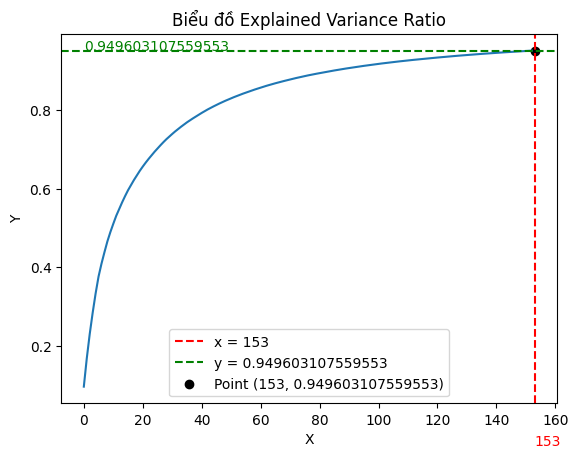

In [27]:
# Biểu đồ tỉ lệ phần trăm biến thiên giải thích
plt.plot(cumulative_variance_ratio)
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tổng tỉ lệ phần trăm biến thiên giải thích')
plt.title('Biểu đồ Explained Variance Ratio')

# Vẽ đường thẳng x = first_index_above và y = accuracy
plt.axvline(x=best_k_of_accuracy, color='red', linestyle='--', label=f'x = {best_k_of_accuracy}')
plt.axhline(y=accuracy, color='green', linestyle='--', label=f'y = {accuracy}')
# Đánh số tại các trục
plt.text(best_k_of_accuracy, accuracy - 1, best_k_of_accuracy, color='red')
plt.text(0, accuracy, f'{accuracy}', color='green')
# Vẽ điểm
plt.scatter(best_k_of_accuracy, accuracy, color='black', label=f'Point ({best_k_of_accuracy}, {accuracy})')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
# plt.grid(True)
plt.show()

## Một số code khác trong quá trình research (tham khảo thôi)

### MNIST

#### Load dữ liệu 

In [245]:
# Load dữ liệu MNIST từ scikit-learn
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(int)

#### Lưu ý : Ở đây nếu không dùng giảm chiều dữ liệu thì khó có thể trực quan hóa được 

#### Phương pháp xác định số chiều tốt nhất để giảm xuống

Để xác định số chiều tốt nhất để giảm xuống trong phân tích thành phần chính (PCA), bạn có thể sử dụng một số kỹ thuật thường được sử dụng như explained variance ratio hoặc biểu đồ scree.

1. **Explained Variance Ratio**: Đây là tỉ lệ phần trăm của sự biến thiên của dữ liệu mà mỗi thành phần chính giải thích. Bạn có thể sử dụng `pca.explained_variance_ratio_` để truy cập thông tin này. Thông thường, bạn sẽ lựa chọn số thành phần chính sao cho tổng tỉ lệ phần trăm biến thiên giải thích đủ lớn, ví dụ: <strong style="color:yellow">95% hoặc 99%.</strong>

2. **Biểu đồ Scree**: Biểu đồ này biểu diễn lượng thông tin giải thích bởi từng thành phần chính theo thứ tự giảm dần. Thông thường, bạn sẽ chọn số thành phần chính khi <strong style="color:yellow">sự giảm đột ngột trong độ dốc của biểu đồ xuất hiện.</strong> 

#### Cách đơn giản nhất là cho nó giảm chiều về chính số chiều của nó sau đó tìm ra số chiều mà có độ chính xác >= Accuracy %

#### Ban đầu ta sẽ cho nó giảm xuống chính số chiều của nó để tìm cumsum của explained_variance_ratio từ đó tìm ra số chiều thấp nhất mà ta có thể giảm xuống tương ứng với Accuracy % mà ta mong muốn 

In [214]:
# Áp dụng PCA để giảm chiều dữ liệu từ 784 chiều xuống còn k chiều
pca = PCA(n_components=X.shape[1])
X_reduced = pca.fit_transform(X)
# Tính tỉ lệ phần trăm biến thiên giải thích bởi mỗi thành phần chính
explained_variance_ratio = pca.explained_variance_ratio_

In [244]:
# explained_variance_ratio

In [215]:
# print(explained_variance_ratio)
print(explained_variance_ratio[0])
print(explained_variance_ratio[0]+explained_variance_ratio[1])

0.09746115922494744
0.16901560509373448


Hàm cumsum chính là hàm cộng dồn các phần tử của một mảng . 
```python
arr = [1,2,3,4,5,6]
print(np.cumsum(arr)) # [ 1  3  6 10 15 21]
```

In [216]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio[-1]) # phần tử cuối cùng của mảng 

1.0000000000000018


In [243]:
# cumulative_variance_ratio

- cumulative_variance_ratio[0] = explained_variance_ratio[0]
- cumulative_variance_ratio[1] = explained_variance_ratio[0] + explained_variance_ratio[1]
- ...
- cumulative_variance_ratio[n] = explained_variance_ratio[0] + ... + explained_variance_ratio[n]


In [217]:
# Tìm giá trị đầu tiên của i sao cho cumulative_variance_ratio[i] >= accuracy 
accuracy = 0.95 # 95% - 99%
best_k_of_accuracy = np.argmax(cumulative_variance_ratio >= accuracy)
print(f"First index with cumulative variance ratio >= {accuracy}:", best_k_of_accuracy)

First index with cumulative variance ratio >= 0.95: 153


#### Biểu đồ tỉ lệ phần trăm biến thiên giải thích

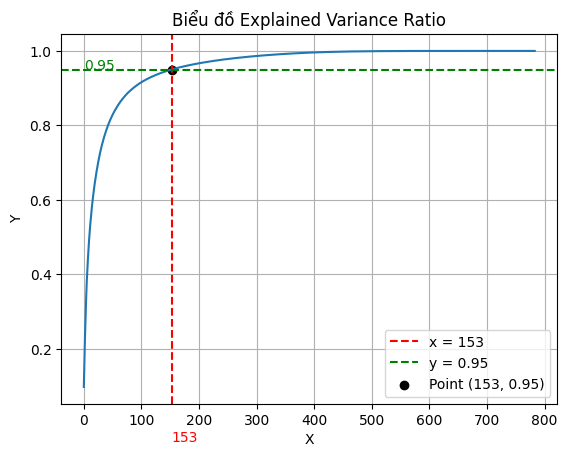

In [240]:
# Biểu đồ tỉ lệ phần trăm biến thiên giải thích
plt.plot(cumulative_variance_ratio)
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tổng tỉ lệ phần trăm biến thiên giải thích')
plt.title('Biểu đồ Explained Variance Ratio')

# Vẽ đường thẳng x = first_index_above và y = accuracy
plt.axvline(x=best_k_of_accuracy, color='red', linestyle='--', label=f'x = {best_k_of_accuracy}')
plt.axhline(y=accuracy, color='green', linestyle='--', label=f'y = {accuracy}')
# Đánh số tại các trục
plt.text(best_k_of_accuracy, accuracy - 1, best_k_of_accuracy, color='red')
plt.text(0, accuracy, f'{accuracy}', color='green')
# Vẽ điểm
plt.scatter(best_k_of_accuracy, accuracy, color='black', label=f'Point ({best_k_of_accuracy}, {accuracy})')

plt.xlabel('X')
plt.ylabel('Y')

plt.legend()
# plt.grid(True)
plt.show()

#### Sau khi tìm ra được Nếu Tổng tỉ lệ phần trăm biến thiên giải thích >= accuracy % thì số chiều giảm xuống thấp nhất có thể là best_k_of_accuracy . Thì ta tiến hành giảm thực tế xuống thành best_k_of_accuracy

In [219]:
# Áp dụng PCA để giảm chiều dữ liệu từ 784 chiều xuống còn k chiều
pca = PCA(n_components=best_k_of_accuracy)
X_reduced = pca.fit_transform(X)

In [220]:
# In số chiều của dữ liệu trước và sau khi giảm chiều
print("Số chiều của dữ liệu trước khi giảm chiều:", X.shape[1])
print("Số chiều của dữ liệu sau khi giảm chiều:", X_reduced.shape[1])

Số chiều của dữ liệu trước khi giảm chiều: 784
Số chiều của dữ liệu sau khi giảm chiều: 153


#### Biểu đồ scatter plot của dữ liệu sau khi giảm chiều

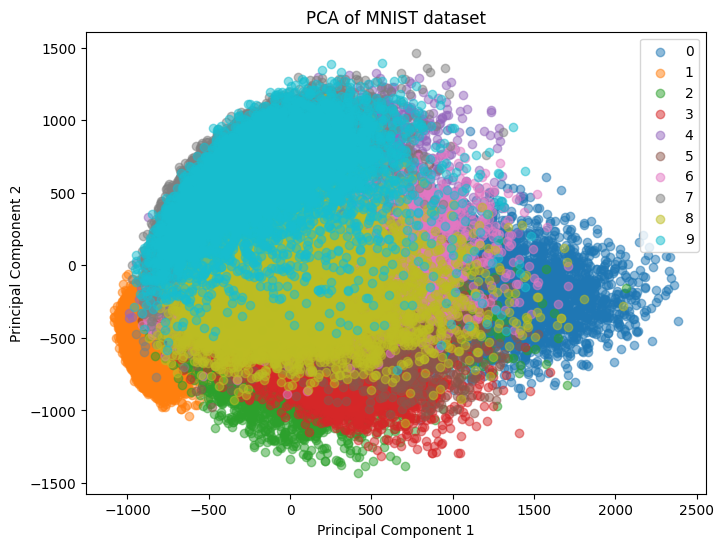

In [221]:
# Vẽ biểu đồ scatter plot của dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], label=str(i), alpha=0.5)
plt.legend()
plt.title('PCA of MNIST dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### PCA cho Iris flower

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load dữ liệu hoa Iris từ scikit-learn
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)
# Áp dụng PCA để giảm chiều dữ liệu từ 4 chiều (số lượng đặc trưng) xuống còn 2 chiều
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# print(X_reduced)
print('X.shape',X.shape)
print('X_reduced.shape',X_reduced.shape)

(150, 4)
(150,)
X.shape (150, 4)
X_reduced.shape (150, 2)


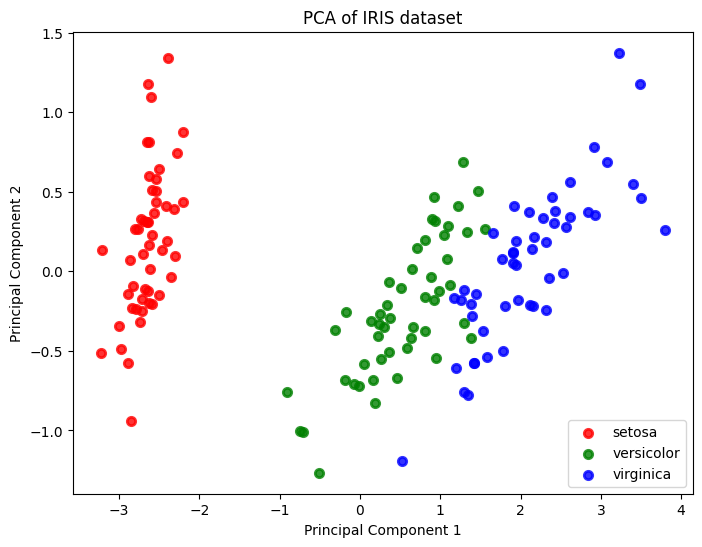

In [223]:
# Vẽ biểu đồ scatter plot của dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()